# 한글 워드 클라우드 그리기

- 주제: 트위터 형태소 분석기를 사용하여 한글에서 명사를 추출한 후 추출된 명사를 이용하여 워드 클라우드를 그린다.꼬꼬마는 너무 느려서 사용하지 않았다. 꼬꼬마 형태소 분석기를 사용하고 싶다면 t = Twitter()를 k = kkma()로 대체한다.
- 작성 날짜: 2018-05-14
- 수정 날짜: 2018-05-14
- 작성자: 부현경 (hyunkyung.boo@gmail.com)

In [1]:
import pandas as pd
import collections
from konlpy.tag import Twitter, Kkma
import re
import nltk

In [2]:
# 읽을 파일의 경로를 설정해준다.
path = 'C:\\Users\\User\\Documents\\MEGA\\test_clover.xlsx'
raw_df = pd.read_excel(path, sheet='Sheet1', index=True)
df = raw_df.copy()
 
# 텍스트 데이터 전처리 과정
new_list = []
for i in range(0, len(raw_df.index)):
    row = raw_df._get_value(index=i, col='defined_clover_review')
    row = re.sub('<.*?>', ' ', row)
    row = re.sub('<[\w\W][^\n]*', ' ', row)
    # print(row)
    new_list.append(row)
     
# 텍스트 데이터 전처리 후 저장된 데이터 확인
# print(new_list)
 
# 요소 세기 (총 245,296건)
#print(len(new_list))
 
# 텍스트 데이터 중복 제거 (중복 제거 후 총 115,388건)
re_nlp_df = list(set(new_list))
#print(len(re_nlp_df))

In [3]:
# 형태소 분석기는 트위터 형태소 분석기로 사용
# 다른 형태소 분석기에 비해 속도가 빠르기 때문
t = Twitter()
nlp_list = []

# 컬럼명을 제외하기 위해 for문의 범위는 1부터 시작한다.
for i in range(1, len(re_nlp_df)):
    row = re_nlp_df[i]
    nouns = t.nouns(row)
    #print(nouns)
    nlp_list.append(nouns)
 
tokens = []
for i in range(0, len(nlp_list)):
    #print(nlp_list[i])
    tokens += nlp_list[i]
#print(tokens)

# Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 1000개
count = collections.Counter(tokens)
tags = count.most_common(1000)
print(tags)

[('책', 30352), ('것', 9604), ('수', 8191), ('내용', 7226), ('너무', 7217), ('아이', 5519), ('이', 5499), ('구매', 5073), ('작가', 4673), ('더', 4506), ('권', 4358), ('생각', 4280), ('이야기', 4142), ('공부', 4018), ('정말', 3868), ('도움', 3675), ('요', 3456), ('마음', 3447), ('구입', 3443), ('사람', 3163), ('문제', 3089), ('좀', 3056), ('그', 3042), ('알', 2964), ('때', 2931), ('유용', 2872), ('보고', 2837), ('대한', 2785), ('작품', 2719), ('글', 2649), ('그림', 2485), ('소설', 2447), ('다시', 2398), ('역시', 2335), ('다른', 2294), ('볼', 2135), ('부분', 2057), ('느낌', 2021), ('나', 1901), ('대해', 1889), ('조금', 1822), ('꼭', 1819), ('시간', 1808), ('내', 1763), ('한번', 1713), ('처음', 1704), ('말', 1668), ('아주', 1642), ('재미', 1631), ('추천', 1630), ('중', 1625), ('저', 1619), ('우리', 1604), ('듯', 1577), ('용', 1566), ('만화', 1526), ('삶', 1523), ('그냥', 1489), ('시리즈', 1466), ('하나', 1453), ('교재', 1450), ('다음', 1441), ('제', 1422), ('또', 1332), ('보기', 1315), ('봐', 1313), ('기대', 1310), ('정도', 1277), ('설명', 1273), ('사랑', 1270), ('여주', 1268), ('거', 1264), ('분', 1257), (

In [8]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
 
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
#워드클라우드 패키지를 불러오자.
from wordcloud import WordCloud
 
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
 
# print(tags)
dict_tags = dict(tags)
#print(dict_tags)

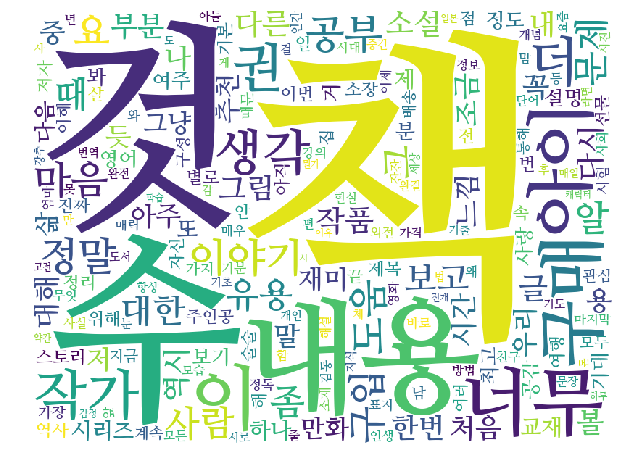

In [9]:
# WordCloud, matplotlib: 워드 클라우드 그리기 
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600, relative_scaling = 0.2)
cloud = wc.generate_from_frequencies(dict_tags)
plt.figure(figsize=(16,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()